<a href="https://colab.research.google.com/github/lydiateinfalt/DATS6202-MachineLearningI-Fall2021/blob/main/LydiaTeinfalt_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

<b>
<p>
<font size="3">
Lydia Teinfalt
</font>
</p>

<p>
<font size="3">
Last Updated: 12/12/2021
</font>
</p>

<p>
<font size="3">
Fall 2021
</font>
</p>
</b>

# Overview

- This notebook includes the final.
- Here we will work on TensorFlow Dataset [stanford_dogs dataset](https://www.tensorflow.org/datasets/catalog/stanford_dogs).
- The goal of this final is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is 0.70. As per the grading rubrics (section 15 of the syllabus), if the test score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named final.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Exam/final/.

# Notebook Configuration

## Google drive

In [3]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/DATS 6202/Final'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [4]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [6]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [7]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [8]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/DATS 6202/code/utilities/p3_deep_learning


## Loading the data

In this case study, we will work on the Tensor Flow [stanford_dogs dataset](https://www.tensorflow.org/datasets/catalog/stanford_dogs).



### Creating the directory for the data

In [9]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Downloading the data to the directory

In [10]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'stanford_dogs'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True,
                       with_info=True)

## Getting the name of the target

In [11]:
target = 'label'

## Getting the info

In [12]:
# Print the splits
info.splits

{'test': <tfds.core.SplitInfo num_examples=8580>,
 'train': <tfds.core.SplitInfo num_examples=12000>}

In [13]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['n02085620-chihuahua',
 'n02085782-japanese_spaniel',
 'n02085936-maltese_dog',
 'n02086079-pekinese',
 'n02086240-shih-tzu',
 'n02086646-blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-rhodesian_ridgeback',
 'n02088094-afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-walker_hound',
 'n02089973-english_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-irish_wolfhound',
 'n02091032-italian_greyhound',
 'n02091134-whippet',
 'n02091244-ibizan_hound',
 'n02091467-norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-saluki',
 'n02092002-scottish_deerhound',
 'n02092339-weimaraner',
 'n02093256-staffordshire_bullterrier',
 'n02093428-american_staffordshire_terrier',
 'n02093647-bedlington_terrier',
 'n02093754-border_terrier',
 'n02093859-kerry_blue_terrier',
 'n02093991-irish_terrier',
 'n02094114-norfolk_terrier',
 'n02094258-norwi

In [14]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

120

## Getting the training, validation and test data

In [15]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/data/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/data/',
                      as_supervised=True)

## Data Augmentation

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

## Resizing the data for pretrained model

In [17]:
# Set the default input size for the pretrained model
global input_size
input_size = [224, 224]

In [18]:
# Resize the training data
data_train = data_train.map(resize)

# Resize the validation data
data_valid = data_valid.map(resize)

# Resize the test data
data_test = data_test.map(resize)

## Preprocessing the data using pretrained model

In [19]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [20]:
# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

## Shuffling, batching and prefetching the data

In [21]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

## Creating the directory for the model

In [22]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/final/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

Using Transfer Learning with Pre-Trained CNN, EfficientNetB0. 

## Building the architecture of the model

In [23]:
# Add the pretrained layers
pretrained_model = keras.applications.EfficientNetB0(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                             

## Freezing the pretrained layers

In [24]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

In [25]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/final/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=3)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [26]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

## Training the model

In [27]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
525/525 [==============================] - 53s 61ms/step - loss: 1.6988 - accuracy: 0.6361 - val_loss: 1.3996 - val_accuracy: 0.7244 - lr: 0.0100
Epoch 2/10
525/525 [==============================] - 26s 47ms/step - loss: 0.6950 - accuracy: 0.8344 - val_loss: 1.5005 - val_accuracy: 0.7358 - lr: 0.0100
Epoch 3/10
525/525 [==============================] - 30s 55ms/step - loss: 0.4668 - accuracy: 0.8832 - val_loss: 1.5330 - val_accuracy: 0.7478 - lr: 0.0100


## Plotting the learning curve

### Creating the directory for the figure

In [28]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/final/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

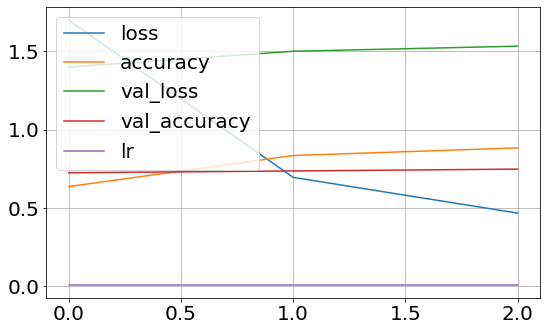

In [29]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/final/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [30]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [31]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Compile the model
#model.compile(optimizer=keras.optimizers.SGD(decay=1e-4),
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

## Training the model

In [33]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
525/525 [==============================] - 92s 156ms/step - loss: 1.1545 - accuracy: 0.6843 - val_loss: 0.9238 - val_accuracy: 0.7536 - lr: 1.0000e-04
Epoch 2/10
525/525 [==============================] - 82s 153ms/step - loss: 0.4641 - accuracy: 0.8571 - val_loss: 0.8591 - val_accuracy: 0.7717 - lr: 1.0000e-04
Epoch 3/10
525/525 [==============================] - 82s 154ms/step - loss: 0.2849 - accuracy: 0.9151 - val_loss: 0.8210 - val_accuracy: 0.7733 - lr: 1.0000e-04
Epoch 4/10
525/525 [==============================] - 81s 151ms/step - loss: 0.2033 - accuracy: 0.9385 - val_loss: 0.8407 - val_accuracy: 0.7764 - lr: 1.0000e-04
Epoch 5/10
525/525 [==============================] - 80s 151ms/step - loss: 0.1406 - accuracy: 0.9613 - val_loss: 0.8837 - val_accuracy: 0.7711 - lr: 1.0000e-04


# Testing

## Loading the saved model

In [34]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/final/model/model.h5')

## Evaluating the model

<p>
Loss = 0.8195
</p>
<p>
Accuracy = 0.7846
</p>

In [35]:
loss, accuracy = model.evaluate(data_test)

537/537 [==============================] - 24s 35ms/step - loss: 0.8195 - accuracy: 0.7846


# Reference
- The code for building, compiling and training CNNs were largely inspired by the following work:
    - Géron, A., 2019. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. O'Reilly Media.

- The deep utilities and pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2021/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb)
    - Huang, Yuxiao, 2021. "Machine Learning I". Fall 2021.

- Image classification via fine-tuning with [EfficientNet](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_efficientnet_fine_tuning.ipynb#scrollTo=e2Jaa2R7tdL9).
  - Fu, Y., 2019. *Image classification via fine-tuning with EfficientNet*


